<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/AIML_CEP_TA_Session_Oct16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this session, we shall learn about linear regression when the predictor variables are high dimensional.

Let us first consider a sample data, which will be useful for our study of linear regression in high dimensions.

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

In [ ]:
#Let us explore the data and the description 

#Get the data from the web 
airline_costs_data = pd.read_csv('https://raw.githubusercontent.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/main/data/airline_costs.txt', delim_whitespace=True, index_col=False, header=None)

#print the first few rows of the data 
airline_costs_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,AllAmerican,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [ ]:
#if you wish to print the entire data, then use the following
airline_costs_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,AllAmerican,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96
5,Central,51,134,4.67,1757,318.5,0.35,0.167,2.096,14.02,0.01,14.01
6,C&S,175,175,8.60,18000,59.2,2.17,0.558,3.889,114.16,3.11,111.05
7,Colonial,112,150,6.87,13500,77.0,1.68,0.505,3.327,35.34,0.79,34.55
8,Continental,131,179,6.50,3831,62.3,1.70,0.537,3.166,49.74,3.49,46.25
9,Delta,174,191,7.60,13119,45.3,2.74,0.598,4.582,174.32,3.87,170.45


In [ ]:
airline_costs_data.columns = ['Airline', 'Flight Length', 'Plane Speed','Daily flight time per plane', 'Population Served','TOC','Revenue','Load Factor','Capacity','Total Assets','Funds','Adjusted Assets']


#check by printing the data again
airline_costs_data.head()

,Airline,Flight Length,Plane Speed,Daily flight time per plane,Population Served,TOC,Revenue,Load Factor,Capacity,Total Assets,Funds,Adjusted Assets
0,AllAmerican,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [ ]:
# shift column 'TOC' to second position
TOC_column = airline_costs_data.pop('TOC') #collect the contents of TOC  column into a temporary object 
  
# insert column into the dataframe using insert(position,column_name, column_contents) function
airline_costs_data.insert(1, 'TOC', TOC_column) #Insert as second column, so position is 1
  
print("After shifting TOC column to second position")
airline_costs_data.head()

After shifting TOC column to second position


,Airline,TOC,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Total Assets,Funds,Adjusted Assets
0,AllAmerican,116.3,57,133,6.10,20200,0.96,0.400,2.400,21.13,3.21,17.92
1,American,43.0,270,216,6.93,56928,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,141.5,100,140,4.45,183,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,50.6,176,182,6.60,11869,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,51.0,142,167,7.47,41097,2.68,0.510,5.255,195.02,6.06,188.96


$\Large{\text{Drop the Total Assets and Funds columns}}$




In [ ]:
airline_costs_data.pop('Total Assets')
airline_costs_data.pop('Funds')


print('Data after dropping Total Assets and Funds columns:')
airline_costs_data.head()

Data after dropping Total Assets and Funds columns:


,Airline,TOC,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Adjusted Assets
0,AllAmerican,116.3,57,133,6.10,20200,0.96,0.400,2.400,17.92
1,American,43.0,270,216,6.93,56928,3.98,0.689,5.776,1271.31
2,Bonanza,141.5,100,140,4.45,183,0.79,0.358,2.207,6.64
3,Braniff,50.6,176,182,6.60,11869,2.57,0.557,4.614,154.49
4,Capital,51.0,142,167,7.47,41097,2.68,0.510,5.255,188.96


$\Large{\text{Split the data into training and test data points}}$

In [ ]:
from sklearn.model_selection import train_test_split
airline_costs_data_train,airline_costs_data_test = train_test_split(airline_costs_data,test_size=0.2, random_state = 500)
print ('size of train set:',len(airline_costs_data_train.index))
print ('Training data:')
airline_costs_data_train


size of train set: 24
Training data:


,Airline,TOC,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Adjusted Assets
3,Braniff,50.6,176,182,6.60,11869,2.57,0.557,4.614,154.49
16,National,42.9,199,207,8.28,23431,3.12,0.567,5.503,165.13
19,Piedmont,75.4,90,153,8.13,3362,1.08,0.449,2.405,18.50
18,Northwest,56.7,271,202,6.88,27000,4.30,0.570,7.544,463.52
20,Pioneer,71.3,89,150,7.05,2050,1.16,0.483,2.402,19.10
30,Wisconsin,130.9,69,142,5.72,6500,0.81,0.430,1.884,10.79
24,TWA,46.2,293,193,6.40,51500,3.62,0.670,5.403,1097.91
25,United,42.3,270,207,6.63,48913,3.75,0.630,5.952,1047.27
6,C&S,59.2,175,175,8.60,18000,2.17,0.558,3.889,111.05
22,Southwest,78.9,54,127,5.85,5143,1.18,0.491,2.403,15.98


In [ ]:
print ('size of test set:',len(airline_costs_data_test.index))
print ('Test data:')
airline_costs_data_test

size of test set: 7
Test data:


,Airline,TOC,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Adjusted Assets
0,AllAmerican,116.3,57,133,6.10,20200,0.96,0.400,2.400,17.92
4,Capital,51.0,142,167,7.47,41097,2.68,0.510,5.255,188.96
15,Mohawk,100.5,79,137,5.88,9250,1.02,0.476,2.143,14.45
12,Frontier,125.2,81,141,7.47,2500,0.72,0.398,1.809,17.54
5,Central,318.5,51,134,4.67,1757,0.35,0.167,2.096,14.01
11,Empire,112.4,59,143,4.83,451,0.69,0.313,2.204,4.69
28,Inland,64.7,147,158,9.38,1000,1.54,0.575,2.678,16.58


$\Large{\text{Computing } \beta \text{ for the training airline costs data set}}:$

In [ ]:
#Let us now compute beta 
n_train = len(airline_costs_data_train.index) #number of data points in the training data set
print('number of data points in the training data set:',n_train)

number of data points in the training data set: 24


In [ ]:
#extract the predictor variable columns 
cols = [2,3,4,5,6,7,8,9]
# print (airline_costs_data.columns[cols])
X_train_data = airline_costs_data_train[airline_costs_data_train.columns[cols]]

X_train_data.head()

,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Adjusted Assets
3,176,182,6.60,11869,2.57,0.557,4.614,154.49
16,199,207,8.28,23431,3.12,0.567,5.503,165.13
19,90,153,8.13,3362,1.08,0.449,2.405,18.50
18,271,202,6.88,27000,4.30,0.570,7.544,463.52
20,89,150,7.05,2050,1.16,0.483,2.402,19.10


In [ ]:
## extracting response variables
response_cols = [1]
y_train = airline_costs_data_train[airline_costs_data_train.columns[response_cols]]
y_train.head()

,TOC
3,50.6
16,42.9
19,75.4
18,56.7
20,71.3


In [ ]:
#convert predictor variable columns into a numpy array

X_train_array = airline_costs_data_train[airline_costs_data_train.columns[cols]].to_numpy()
X_train_array

array([[1.76000e+02, 1.82000e+02, 6.60000e+00, 1.18690e+04, 2.57000e+00,
        5.57000e-01, 4.61400e+00, 1.54490e+02],
       [1.99000e+02, 2.07000e+02, 8.28000e+00, 2.34310e+04, 3.12000e+00,
        5.67000e-01, 5.50300e+00, 1.65130e+02],
       [9.00000e+01, 1.53000e+02, 8.13000e+00, 3.36200e+03, 1.08000e+00,
        4.49000e-01, 2.40500e+00, 1.85000e+01],
       [2.71000e+02, 2.02000e+02, 6.88000e+00, 2.70000e+04, 4.30000e+00,
        5.70000e-01, 7.54400e+00, 4.63520e+02],
       [8.90000e+01, 1.50000e+02, 7.05000e+00, 2.05000e+03, 1.16000e+00,
        4.83000e-01, 2.40200e+00, 1.91000e+01],
       [6.90000e+01, 1.42000e+02, 5.72000e+00, 6.50000e+03, 8.10000e-01,
        4.30000e-01, 1.88400e+00, 1.07900e+01],
       [2.93000e+02, 1.93000e+02, 6.40000e+00, 5.15000e+04, 3.62000e+00,
        6.70000e-01, 5.40300e+00, 1.09791e+03],
       [2.70000e+02, 2.07000e+02, 6.63000e+00, 4.89130e+04, 3.75000e+00,
        6.30000e-01, 5.95200e+00, 1.04727e+03],
       [1.75000e+02, 1.75000e+02

In [ ]:
import numpy as np
#add a column of ones to X_train_array
# print (X_train_array.shape) ## size of X_train_array
# print (np.ones((X_train_array.shape[0], 1)))
X_train = np.hstack((X_train_array, np.ones((X_train_array.shape[0], 1), dtype=X_train_array.dtype)))

X_train

array([[1.76000e+02, 1.82000e+02, 6.60000e+00, 1.18690e+04, 2.57000e+00,
        5.57000e-01, 4.61400e+00, 1.54490e+02, 1.00000e+00],
       [1.99000e+02, 2.07000e+02, 8.28000e+00, 2.34310e+04, 3.12000e+00,
        5.67000e-01, 5.50300e+00, 1.65130e+02, 1.00000e+00],
       [9.00000e+01, 1.53000e+02, 8.13000e+00, 3.36200e+03, 1.08000e+00,
        4.49000e-01, 2.40500e+00, 1.85000e+01, 1.00000e+00],
       [2.71000e+02, 2.02000e+02, 6.88000e+00, 2.70000e+04, 4.30000e+00,
        5.70000e-01, 7.54400e+00, 4.63520e+02, 1.00000e+00],
       [8.90000e+01, 1.50000e+02, 7.05000e+00, 2.05000e+03, 1.16000e+00,
        4.83000e-01, 2.40200e+00, 1.91000e+01, 1.00000e+00],
       [6.90000e+01, 1.42000e+02, 5.72000e+00, 6.50000e+03, 8.10000e-01,
        4.30000e-01, 1.88400e+00, 1.07900e+01, 1.00000e+00],
       [2.93000e+02, 1.93000e+02, 6.40000e+00, 5.15000e+04, 3.62000e+00,
        6.70000e-01, 5.40300e+00, 1.09791e+03, 1.00000e+00],
       [2.70000e+02, 2.07000e+02, 6.63000e+00, 4.89130e+04, 3.

In [ ]:
#convert response variable columns into a numpy array

response_cols = [1]
y_train = airline_costs_data_train[airline_costs_data_train.columns[response_cols]].to_numpy()
y_train

array([[ 50.6],
       [ 42.9],
       [ 75.4],
       [ 56.7],
       [ 71.3],
       [130.9],
       [ 46.2],
       [ 42.3],
       [ 59.2],
       [ 78.9],
       [ 42.6],
       [141.5],
       [ 45.3],
       [150.1],
       [ 44.2],
       [820.9],
       [169.3],
       [ 77. ],
       [ 62.3],
       [ 64.8],
       [ 81.1],
       [ 43. ],
       [130.3],
       [103.3]])

In [ ]:
#Now we are ready for finding beta on training data
print('X shape:',X_train.shape,'y shape:',y_train.shape)

XTX_train = np.matmul(np.transpose(X_train),X_train)
print('XTX shape:',XTX_train.shape)

XTy_train = np.matmul(np.transpose(X_train),y_train)
print('XTy shape:',XTy_train.shape)

beta_train = np.matmul(np.linalg.inv(XTX_train),XTy_train)
print ('rank of XTX', np.linalg.matrix_rank(XTX_train))
print('beta_train',beta_train)

X shape: (24, 9) y shape: (24, 1)
XTX shape: (9, 9)
XTy shape: (9, 1)
rank of XTX 9
beta_train [[-1.41274202e-01]
 [-1.97545853e+00]
 [ 1.26467128e+01]
 [ 4.64566944e-03]
 [ 7.24730562e+02]
 [-2.17544179e+03]
 [-3.77738888e+02]
 [-3.14172003e-01]
 [ 1.40022586e+03]]


$\Large{\text{Residual Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j$.

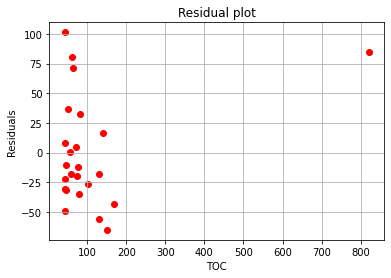

In [ ]:
e_i_residuals_list_train = [] 
for i in range(n_train): 
  x_i = X_train[i,:] #access i-th row of X_train
  y_i = y_train[i] #access i-th row of y_train

  y_pred_i = np.dot(x_i,beta_train) # compute the prediction obtained using the regression coefficients 
  e_i_train = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  e_i_residuals_list_train.append(e_i_train) #append the value of e_i_train to the list 

# print (len(airline_costs_data_train['TOC']))
# print (train_e_i_residuals_list)
#plot the residuals e_i against the actual observations y_i
plt.scatter(airline_costs_data_train['TOC'], e_i_residuals_list_train,color='r')
plt.title("Residual plot")
plt.xlabel("TOC")
plt.ylabel("Residuals")
plt.grid()
plt.show()

$\Large{\text{Computing $R^2$ value for train data}}$

In [ ]:
#We shall now compute R^2 for training airline costs data

#first we shall compute y_bar 
y_bar_train = 0
for i in range(n_train): #access each row from the training data set 
  y_train_i = float(airline_costs_data_train.iat[i,1]) #access element at TOC column
  y_bar_train += y_train_i

y_bar_train /= n_train
print('y_bar_train',y_bar_train)

#Next we shall compute sigma_yy, which is the variance of y_train
sigma_yy_train = 0
for i in range(n_train): #access each row from the training data set 
  y_i = float(airline_costs_data_train.iat[i,1]) #access element at TOC column
  sigma_yy_train += (y_i-y_bar_train)**2

print('sigma_yy_train:', sigma_yy_train)

#now we can compute sum of squared residuals 
sum_sq_residuals_train = 0
for i in range(n_train): #access each row from the training data set 
  x_i = X_train[i,:] #access i-th row of X_train
  y_i = y_train[i] #access i-th row of y_train

  y_pred_i = np.dot(x_i,beta_train) #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  sum_sq_residuals_train += (e_i)**2

print('sum of squared residuals:', sum_sq_residuals_train)
print('Root Mean Squared Error (RMSE):', np.sqrt(sum_sq_residuals_train/n_train))

#Then we will compute the R^2 quantity
R_sq_train = 1-sum_sq_residuals_train/sigma_yy_train
print('R^2 score:',R_sq_train)

y_bar_train 109.58750000000003
sigma_yy_train: 561943.3862500001
sum of squared residuals: [49280.31207741]
Root Mean Squared Error (RMSE): [45.31386473]
R^2 score: [0.91230378]


$\Large{\text{Performance on airline costs test data}}$

$\large{\text{First, let us prepare the test data as numpy arrays}}$

In [ ]:
#extract the predictor variable columns 
cols = [2,3,4,5,6,7,8,9]
# print (airline_costs_data.columns[cols])
X_test_data = airline_costs_data_test[airline_costs_data_test.columns[cols]]

X_test_data

,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Adjusted Assets
0,57,133,6.10,20200,0.96,0.400,2.400,17.92
4,142,167,7.47,41097,2.68,0.510,5.255,188.96
15,79,137,5.88,9250,1.02,0.476,2.143,14.45
12,81,141,7.47,2500,0.72,0.398,1.809,17.54
5,51,134,4.67,1757,0.35,0.167,2.096,14.01
11,59,143,4.83,451,0.69,0.313,2.204,4.69
28,147,158,9.38,1000,1.54,0.575,2.678,16.58


In [ ]:
## extracting response variables
response_cols = [1]
y_test = airline_costs_data_test[airline_costs_data_test.columns[response_cols]]
y_test

,TOC
0,116.3
4,51.0
15,100.5
12,125.2
5,318.5
11,112.4
28,64.7


In [ ]:
#convert predictor variable columns into a numpy array

X_test_array = airline_costs_data_test[airline_costs_data_test.columns[cols]].to_numpy()
X_test_array

array([[5.7000e+01, 1.3300e+02, 6.1000e+00, 2.0200e+04, 9.6000e-01,
        4.0000e-01, 2.4000e+00, 1.7920e+01],
       [1.4200e+02, 1.6700e+02, 7.4700e+00, 4.1097e+04, 2.6800e+00,
        5.1000e-01, 5.2550e+00, 1.8896e+02],
       [7.9000e+01, 1.3700e+02, 5.8800e+00, 9.2500e+03, 1.0200e+00,
        4.7600e-01, 2.1430e+00, 1.4450e+01],
       [8.1000e+01, 1.4100e+02, 7.4700e+00, 2.5000e+03, 7.2000e-01,
        3.9800e-01, 1.8090e+00, 1.7540e+01],
       [5.1000e+01, 1.3400e+02, 4.6700e+00, 1.7570e+03, 3.5000e-01,
        1.6700e-01, 2.0960e+00, 1.4010e+01],
       [5.9000e+01, 1.4300e+02, 4.8300e+00, 4.5100e+02, 6.9000e-01,
        3.1300e-01, 2.2040e+00, 4.6900e+00],
       [1.4700e+02, 1.5800e+02, 9.3800e+00, 1.0000e+03, 1.5400e+00,
        5.7500e-01, 2.6780e+00, 1.6580e+01]])

In [ ]:
#add a column of ones to X_train_array
X_test = np.hstack((X_test_array, np.ones((X_test_array.shape[0], 1), dtype=X_test_array.dtype)))

X_test

array([[5.7000e+01, 1.3300e+02, 6.1000e+00, 2.0200e+04, 9.6000e-01,
        4.0000e-01, 2.4000e+00, 1.7920e+01, 1.0000e+00],
       [1.4200e+02, 1.6700e+02, 7.4700e+00, 4.1097e+04, 2.6800e+00,
        5.1000e-01, 5.2550e+00, 1.8896e+02, 1.0000e+00],
       [7.9000e+01, 1.3700e+02, 5.8800e+00, 9.2500e+03, 1.0200e+00,
        4.7600e-01, 2.1430e+00, 1.4450e+01, 1.0000e+00],
       [8.1000e+01, 1.4100e+02, 7.4700e+00, 2.5000e+03, 7.2000e-01,
        3.9800e-01, 1.8090e+00, 1.7540e+01, 1.0000e+00],
       [5.1000e+01, 1.3400e+02, 4.6700e+00, 1.7570e+03, 3.5000e-01,
        1.6700e-01, 2.0960e+00, 1.4010e+01, 1.0000e+00],
       [5.9000e+01, 1.4300e+02, 4.8300e+00, 4.5100e+02, 6.9000e-01,
        3.1300e-01, 2.2040e+00, 4.6900e+00, 1.0000e+00],
       [1.4700e+02, 1.5800e+02, 9.3800e+00, 1.0000e+03, 1.5400e+00,
        5.7500e-01, 2.6780e+00, 1.6580e+01, 1.0000e+00]])

In [ ]:
#convert predictor variable columns into a numpy array

response_cols = [1]
y_test = airline_costs_data_test[airline_costs_data_test.columns[response_cols]].to_numpy()
y_test

array([[116.3],
       [ 51. ],
       [100.5],
       [125.2],
       [318.5],
       [112.4],
       [ 64.7]])

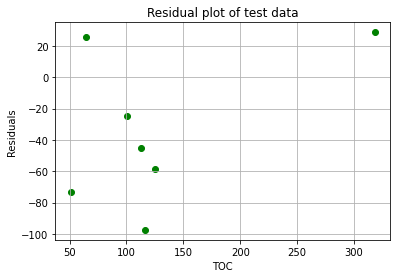

In [ ]:
## we first compute size of test data
n_test = len(airline_costs_data_test.index) #number of data points in the test data
# print('number of data points in the test data:',n_test)

e_i_residuals_list_test = [] ## stores residuals on test data
for i in range(n_test): 
  x_i = X_test[i,:] #access i-th row of X_test
  y_i = y_test[i] #access i-th row of y_test

  y_pred_i = np.dot(x_i,beta_train) # compute the prediction obtained using the regression coefficients 
  e_i_test = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  e_i_residuals_list_test.append(e_i_test) #append the value of e_i_test to the list 


plt.scatter(airline_costs_data_test['TOC'], e_i_residuals_list_test,color='g')
plt.title("Residual plot of test data")
plt.xlabel("TOC")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [ ]:
#We shall now compute R^2 for training airline costs data

#first we shall compute y_bar 
y_bar_test = 0
for i in range(n_test): #access each row from the test data set 
  y_test_i = float(airline_costs_data_test.iat[i,1]) #access element at TOC column
  y_bar_test += y_test_i

y_bar_test /= n_test
print('y_bar_test',y_bar_test)

#Next we shall compute sigma_yy, which is the variance of y_test
sigma_yy_test = 0
for i in range(n_test): #access each row from the training data set 
  y_i = float(airline_costs_data_test.iat[i,1]) #access element at TOC column
  sigma_yy_test += (y_i-y_bar_test)**2

print('sigma_yy_test:', sigma_yy_test)

#now we can compute sum of squared residuals 
sum_sq_residuals_test = 0
for i in range(n_test): #access each row from the training data set 
  x_i = X_test[i,:] #access i-th row of X_test
  y_i = y_test[i] #access i-th row of y_test

  y_pred_i = np.dot(x_i,beta_train) #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  sum_sq_residuals_test += (e_i)**2

print('sum of squared residuals:', sum_sq_residuals_test)
rmse = np.sqrt(sum_sq_residuals_test/n_test)
print('Root Mean Squarred Error (RMSE):', rmse)

#Then we will compute the R^2 quantity
R_sq_test = 1 - sum_sq_residuals_test/sigma_yy_test
print('R^2 score:',R_sq_test)

y_bar_test 126.94285714285715
sigma_yy_test: 47362.657142857155
sum of squared residuals: [22401.06740857]
Root Mean Squarred Error (RMSE): [56.56989029]
R^2 score: [0.52703102]


$\Large{\text{Finding $\beta$ using sklearn library}}$

In [ ]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)
#print the coefficients and the intercept
print('intercept: ', LR.intercept_)
print('coefficients:')
print(LR.coef_)

print('Recall the coefficients and intercept from our formula:')
print(beta_train)

intercept:  [1400.22586244]
coefficients:
[[-1.41274202e-01 -1.97545853e+00  1.26467128e+01  4.64566944e-03
   7.24730562e+02 -2.17544179e+03 -3.77738888e+02 -3.14172003e-01
   0.00000000e+00]]
Recall the coefficients and intercept from our formula:
[[-1.41274202e-01]
 [-1.97545853e+00]
 [ 1.26467128e+01]
 [ 4.64566944e-03]
 [ 7.24730562e+02]
 [-2.17544179e+03]
 [-3.77738888e+02]
 [-3.14172003e-01]
 [ 1.40022586e+03]]


$\large{\text{Compute predictions on train data}}$

In [ ]:
y_train_prediction = LR.predict(X_train)

In [ ]:
# importing R2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# computing R2 score and sum of square residuals
score=r2_score(y_train,y_train_prediction)
print('From scikit learn:')
print('R2 score is:',score)
mse=mean_squared_error(y_train,y_train_prediction)
print('sum of squared residuals:',n_train*mse)
print('RMSE:',np.sqrt(mse))
print('*****************')

print('Recall the R2 score, sum of squared resuiduals and rmse from our formula: ')
print('R2:',R_sq_train)
print('sum of squared residuals:',sum_sq_residuals_train)
print('RMSE:',np.sqrt(sum_sq_residuals_train/n_train))

From scikit learn:
R2 score is: 0.9123037777768537
sum of squared residuals: 49280.31207740735
RMSE: 45.31386472768174
*****************
Recall the R2 score, sum of squared resuiduals and rmse from our formula: 
R2: [0.91230378]
sum of squared residuals: [49280.31207741]
RMSE: [45.31386473]


$\large{\text{Compute predictions on test data:}}$

In [ ]:
## we will now plot the residuals and find R2 score on test data

y_test_prediction =  LR.predict(X_test)

In [ ]:
score = r2_score(y_test,y_test_prediction)
print('From scikit learn:')
print('R2 score is',score)
print('Sum of squared residuals',n_test*mean_squared_error(y_test,y_test_prediction))
print('RMSE', mean_squared_error(y_test,y_test_prediction,squared=False))
print('***********************')

print('Recall the R2 score, sum of squared resuiduals and rmse from our formula: ')
print('R2:',R_sq_test)
print('sum of squared residuals:',sum_sq_residuals_test)
print('RMSE:',np.sqrt(sum_sq_residuals_test/n_test))

From scikit learn:
R2 score is 0.5270310248638075
Sum of squared residuals 22401.06740858402
RMSE 56.569890285739234
***********************
Recall the R2 score, sum of squared resuiduals and rmse from our formula: 
R2: [0.52703102]
sum of squared residuals: [22401.06740857]
RMSE: [56.56989029]
